May: **Research Questions 2.2** (Ideal and Real)

# Which of the three upwelling mechanisms (time dependence, advection, convergence of isobaths, coastal trapped wave) provides the strongest contribution to upwelling in Mackenzie Canyon?

At what depths does maximum upwelling occur?

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/upwelling_depth/')
import upwelling_functions

import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime 

/home/imachuca/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
def get_max_displacement(dirname, fname, meshmaskname, dep_ind, time_s, time_f, vosaline_ref_profile):

    vosaline, sozotaux, deptht, tmask = upwelling_functions.get_vars_salt(dirname, fname, meshmaskname, 
                                                                            dep_ind, time_s, time_f, None)
    max_vosaline = np.full([vosaline.shape[0]], np.nan)
    
    for t in range(vosaline.shape[0]):
        max_vosaline[t] = np.nanmax(vosaline[t, :, :])
        
    max_depth_ind = upwelling_functions.get_daily_depth_ind(max_vosaline, vosaline_ref_profile)
    max_depth_m, max_depth_upwelled = upwelling_functions.get_daily_depth_m(deptht, dep_ind, max_depth_ind, tmask)
        
    return max_depth_upwelled, sozotaux, deptht

In [3]:
def plot_axes(axes, n, dep_inds, dirname, fname, meshmaskname, time_s, time_f, vosaline_ref_profile):
    
    y,x = slice(1,-1,None), slice(1,-1,None)
    with nc.Dataset(os.path.join(dirname, meshmaskname), 'r') as dsM:
        Tmask = dsM.variables['tmask'][0, :, y, x]
    ys = np.arange(Tmask.shape[-2])
    cmap = LinearSegmentedColormap.from_list('mycmap', ['wheat', 'white'])

    cm_times = np.linspace(0, 1, len(dep_inds))
    colors = [cmo.cm.matter(x) for x in cm_times]
    
    for dep_ind, c in zip (dep_inds, colors):
        print(dep_ind)
        
        max_depth_upwelled, sozotaux, deptht = get_max_displacement(dirname, fname, meshmaskname, dep_ind, 
                                                                           time_s, time_f, vosaline_ref_profile)
    
        ts = np.arange(time_s+1, time_f+1)
        axes[n, 1].plot(ts, max_depth_upwelled, c=c, lw=1.5, label=str(int(deptht[dep_ind])))
        axes[n, 1].xaxis.set_ticks(np.arange(time_s+1, time_f+1, 24))
        axes[n, 1].set_ylim([0, 300])
        axes[n, 1].set_xlim([0, ts[-1]])
        axes[n, 1].legend(ncol=12, loc=1, fontsize=13)
        axes[n, 1].grid()
        
        axes[n, 0].axhline(deptht[dep_ind], c=c, lw=1.5)
    
    ind_mid = int(Tmask.shape[-1]*0.5)
    axes[n, 0].pcolormesh(ys, deptht, Tmask[:, :, ind_mid], cmap=cmap)
    axes[n, 0].set_ylim([1300, 0])
        
    return axes, sozotaux

In [4]:
def execute_functions(dirname, fname, meshmaskname, time_s, time_f, vosaline_ref_profile, kind, case):

    fig, axes = plt.subplots(4, 2, figsize=(20, 16), gridspec_kw={"width_ratios":[1, 3], "height_ratios":[1, 3, 3, 3]})
    fig.tight_layout(w_pad=0.5, h_pad=2)

    n=1; dep_inds = np.arange(1,10)[::2].tolist()
    axes, sozotaux = plot_axes(axes, n, dep_inds, dirname, fname, meshmaskname, time_s, time_f, vosaline_ref_profile)
    
    n=2; dep_inds = np.arange(11,52)[::4].tolist()
    axes, sozotaux = plot_axes(axes, n, dep_inds, dirname, fname, meshmaskname, time_s, time_f, vosaline_ref_profile)
    
    n=3; dep_inds = np.arange(53,79)[::3].tolist()
    axes, sozotaux = plot_axes(axes, n, dep_inds, dirname, fname, meshmaskname, time_s, time_f, vosaline_ref_profile)

    ts = np.arange(time_s+1, time_f+1)
    axes[0, 0].remove()
    axes[0, 1].plot(ts, sozotaux, c='k', lw=2)
    axes[0, 1].xaxis.set_ticks(np.arange(time_s+1, time_f+1, 23))
    axes[0, 1].set_title('Wind Stress [$Nm^{-2}$]', fontsize=20)
    axes[0, 1].xaxis.set_ticks(np.arange(time_s+1, time_f+1, 24))
    axes[0, 1].set_xlim([0, ts[-1]])
    axes[0, 1].grid()
    
    plt.subplots_adjust(top=0.90)
    fig.suptitle(kind+' - '+case+': '+' maximum vertical displacement [m] at various depths', fontsize=30)

    fig.savefig('../writing_images/displaced_max_all_depths_'+kind+'_'+case+'.png', dpi=100, bbox_inches='tight')
    
    return

# Constants

In [5]:
vosaline_ref = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc')['vosaline'][:]
vosaline_ref_profile = vosaline_ref[0, :, 0, 0]

fname = '1_MCKNZ_1h_20170101_201701*'
meshmaskname = '1_mesh_mask.nc'

time_s = 0 # python count
time_f = 10*24 # python count

# Ideal

1
3
5
7
9
11
15
19
23
27
31
35
39
43
47
51
53
56
59
62
65
68
71
74
77


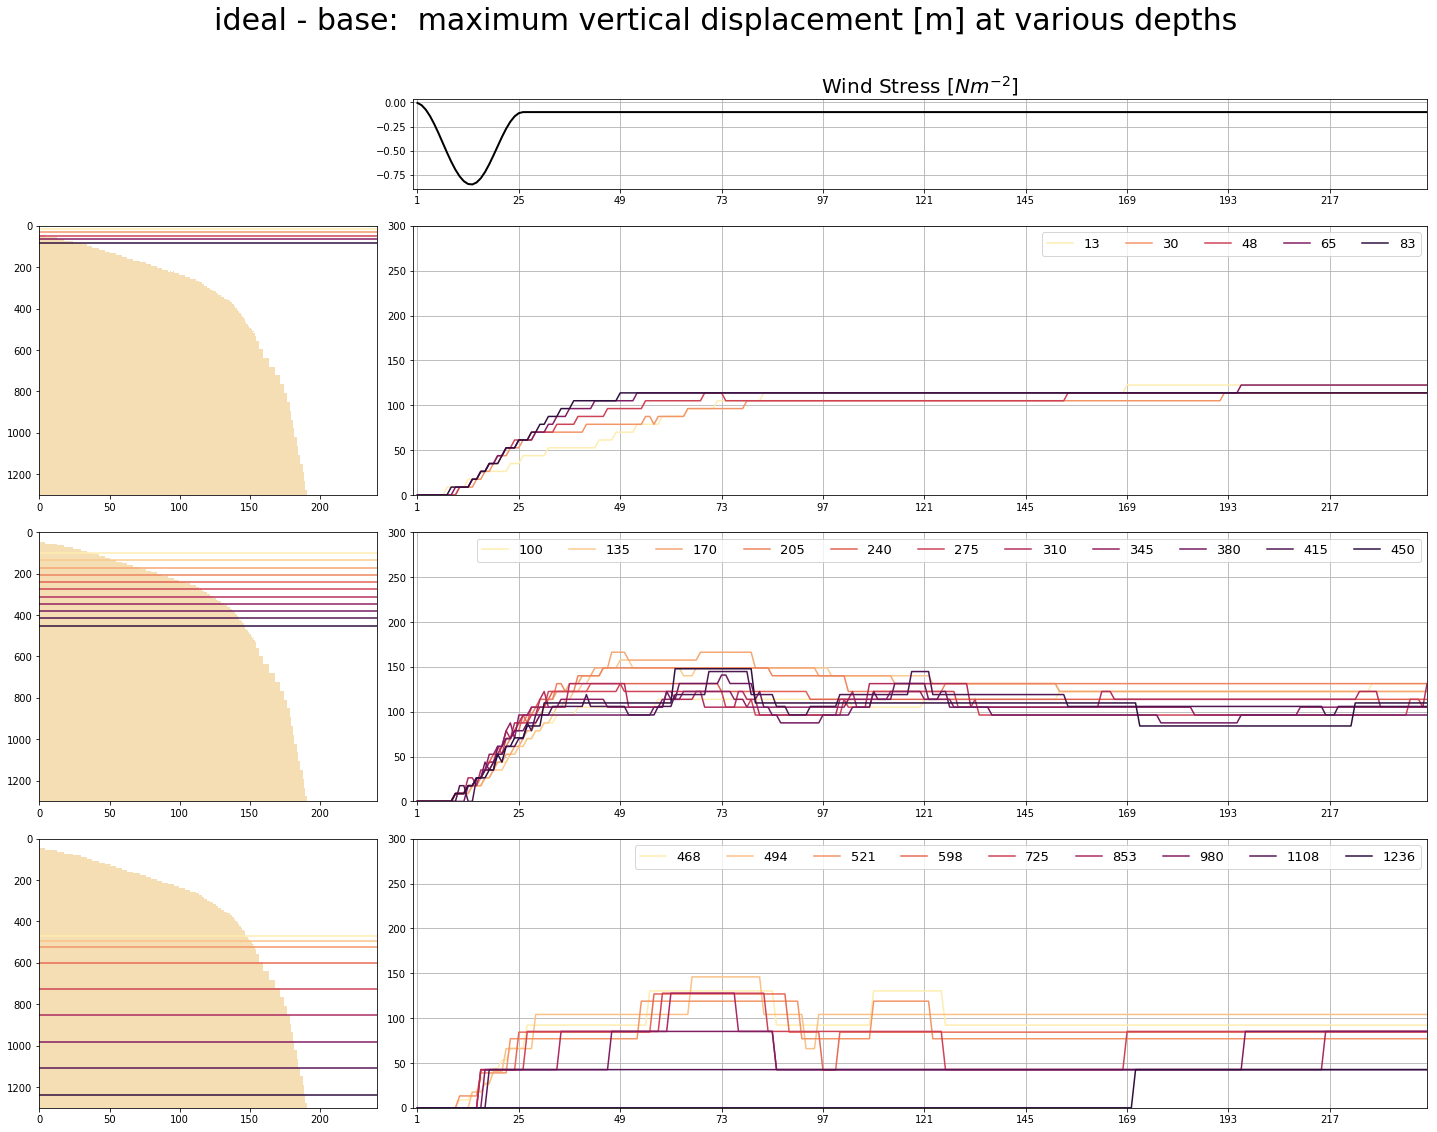

In [6]:
kind = 'ideal'
case = 'base'
dirname = '/ocean/imachuca/Canyons/results_mackenzie/extended_domain/'+kind+'_'+case+'/'
execute_functions(dirname, fname, meshmaskname, time_s, time_f, vosaline_ref_profile, kind, case)

# Real

1
3
5
7
9
11
15
19
23
27
31
35
39
43
47
51
53
56
59
62
65
68
71
74
77


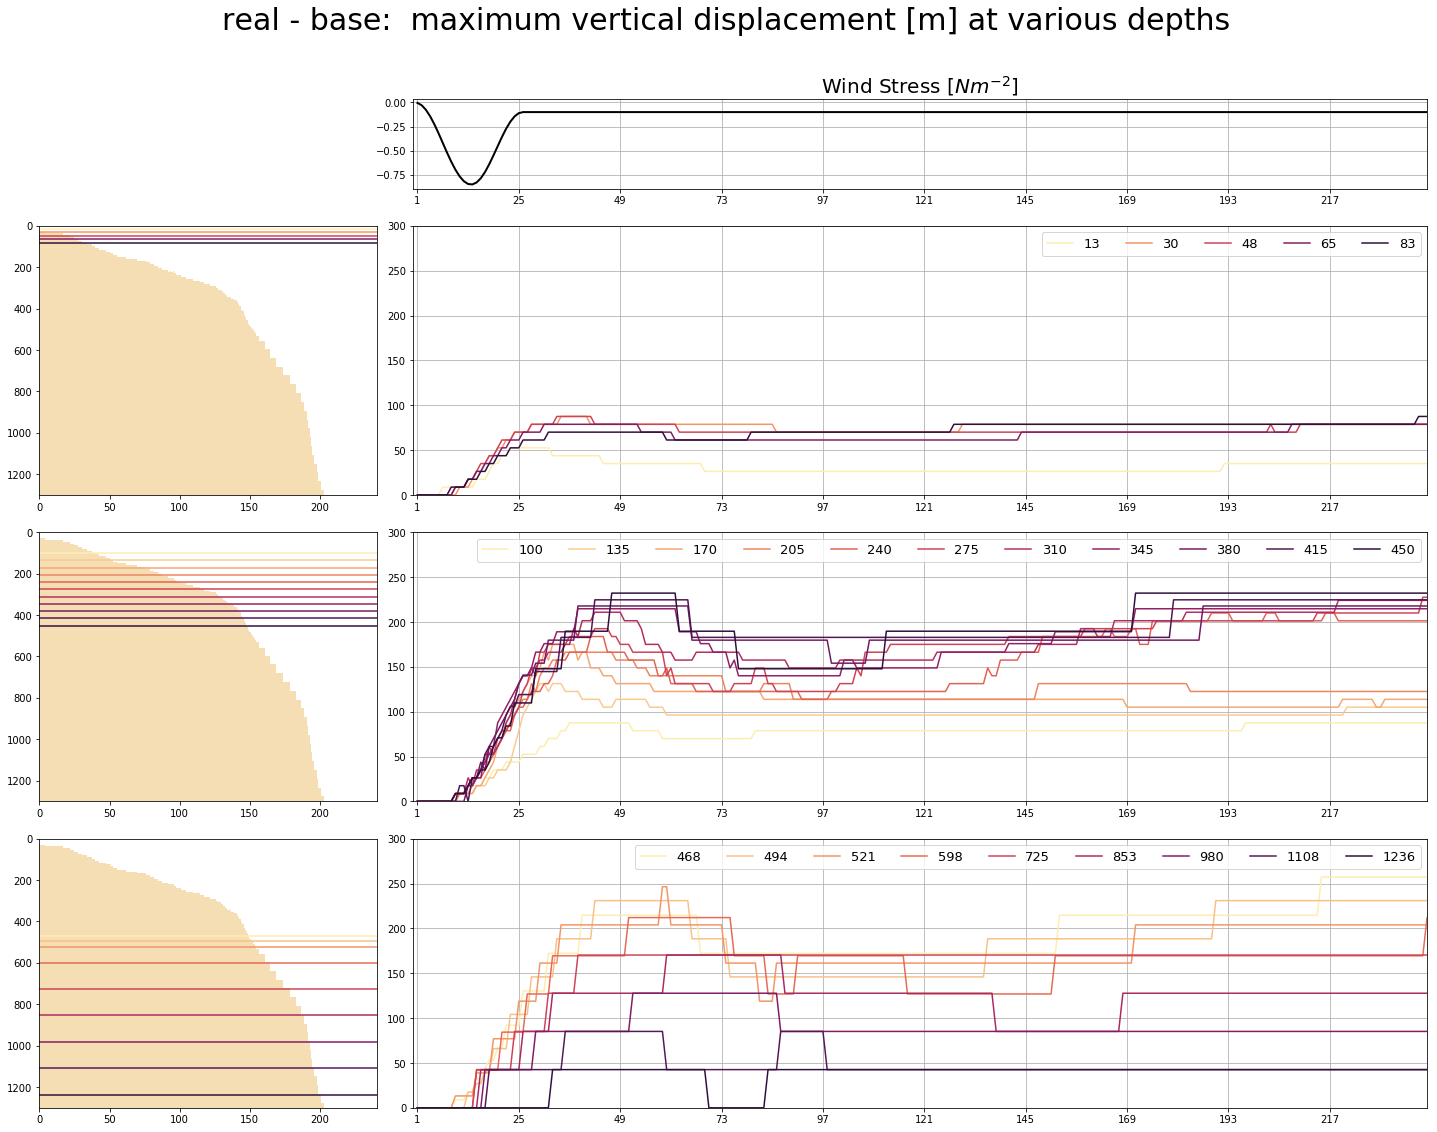

In [7]:
kind = 'real'
case = 'base'
dirname = '/ocean/imachuca/Canyons/results_mackenzie/extended_domain/'+kind+'_'+case+'/'
execute_functions(dirname, fname, meshmaskname, time_s, time_f, vosaline_ref_profile, kind, case)